# **CLASIFICACIÓN : Encuesta a Clientes Bancarios - Marketing para Depósito a Plazo**

*El tema de este trabajo es crear un modelo de clasificación binaria para saber si un cliente suscribiría un depósito a plazo. Esta información se basaría en llamadas telefónicas realizadas por campañas de marketing. Uno de los problemas que hacen que este conjunto de datos sea interesante es que el conjunto de datos está desequilibrado, lo que significa que tenemos una frecuencia mayor en la clase 0 que en la clase 1.*

El conjunto de datos tiene información sobre clientes y campañas de telemarketing realizadas por un banco. Hay una columna llamada "y" en el conjunto de datos que nos dice si el cliente optó o no por el depósito a plazo. 

**Significado de columnas:**

* Age :numérico
* Job :Tipo de trabajo (categórico)
* Marital : Estado civil
* Education : Nivel de educación del cliente
* default : ¿Tiene el crédito en default? (binario: "yes","no")
* Balance : saldo medio anual, en euros (numérico)
* Housing : tiene préstamo de vivienda? (binario: "yes","no")
* Loan : tiene préstamo personal? (binario: "yes","no")
* Contact: tipo de comunicación del contacto (categórico: "desconocido","teléfono","celular")
* Day : último día de contacto del mes (numérico)
* Month : último mes de contacto del año (categóricos: "ene", "feb", "mar", ..., "nov", "dec")
* Duration : duración del último contacto, en segundos (numérico), importante
* Campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye último contacto)
* Pdays : número de días que pasaron después de que se contactó al cliente por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue    contactado previamente)
* Previous : número de contactos realizados antes de esta campaña y para este cliente (numérico)
* Poutcome : resultado de la campaña de marketing anterior (categórico: "desconocido","otro","fracaso","éxito")
* Y : ¿El cliente ha suscrito un depósito a plazo? (binario: yes, no) , TARGET


Fuente de datos: https://www.kaggle.com/datasets/sharanmk/bank-marketing-term-deposit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from numpy import math
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

## **Análisis Exploratorio:**

In [33]:
bank=pd.read_csv("bank-full.csv", delimiter=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Analizando las columnas numericas por separado según el valor de 'Y'**

In [7]:
bank[bank['y']=='yes'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354
std,13.497781,3501.104777,8.501875,392.525262,1.921826,118.822266,2.553272
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,31.000000,210.000000,8.000000,244.000000,1.000000,-1.000000,0.000000
50%,38.000000,733.000000,15.000000,426.000000,2.000000,-1.000000,0.000000
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,98.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,854.000000,58.000000


In [8]:
bank[bank['y']=='no'].describe()

,age,balance,day,duration,campaign,pdays,previous
count,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000,39922.000000
mean,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
std,10.172662,2974.195473,8.294728,207.383237,3.212767,96.757135,2.256771
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,58.000000,8.000000,95.000000,1.000000,-1.000000,0.000000
50%,39.000000,417.000000,16.000000,164.000000,2.000000,-1.000000,0.000000
75%,48.000000,1345.000000,21.000000,279.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* Podemos notar que tenemos 5289 registros donde el valor de Y es yes, y 39922 registros donde el valor de Y es No, por lo tanto tenemos un desbalance de clases de aproximadamente:(Yes:12% vs No:88% )

* Podemos ver también que la duración es de 221 seg en promedio para la clase "NO"  y de 537 seg en promedio para la clase "Yes"

* Asimismo, podemos ver que el número de contactos previos a la campañana máximo que se le hizo a algún cliente que aceptó es de 58 , mientras que para los que rechazaron es de 275. 

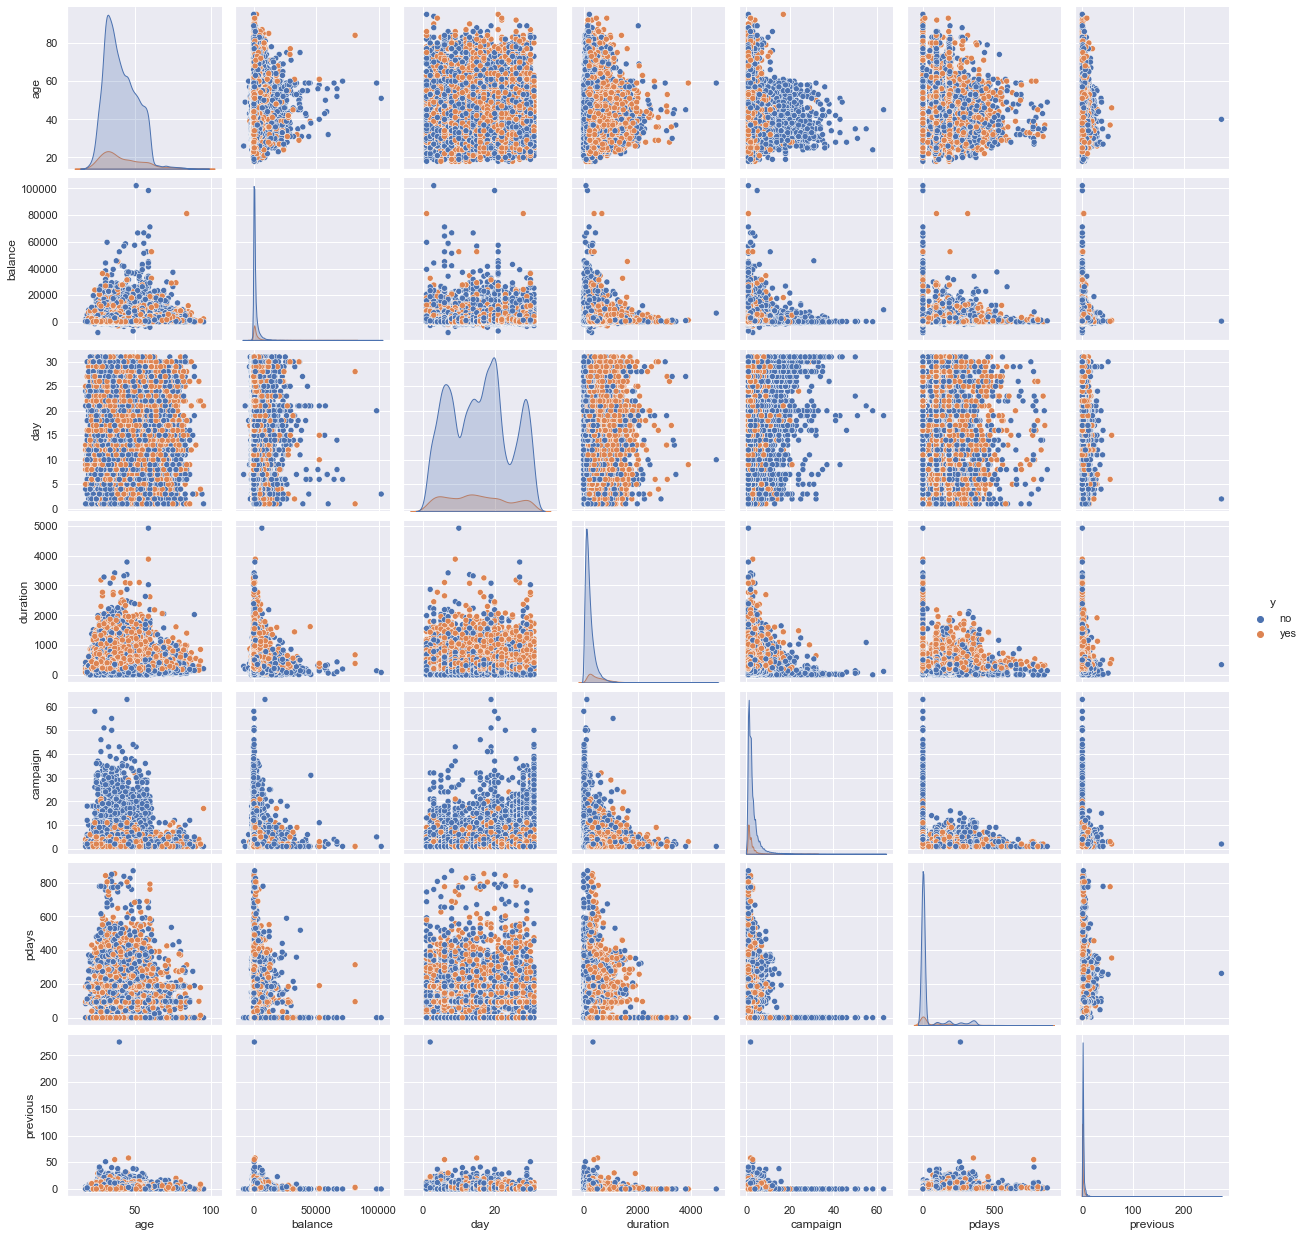

In [3]:
pair = sns.pairplot(bank, hue='y')

**Visualizando las distribuciones por clase para algunas variables numéricas**

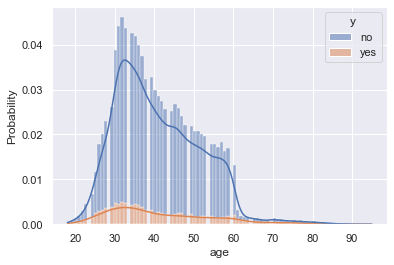

In [8]:
plot=sns.histplot(data=bank, x="age", hue="y", stat='probability', multiple="stack",  kde=True)

*Podemos ver que en el intervalo de 30 - 40 años se acumula la myor probabilidad de que la persona acepte suscribirse a un depósito a plazo.*

<AxesSubplot:xlabel='day', ylabel='Probability'>

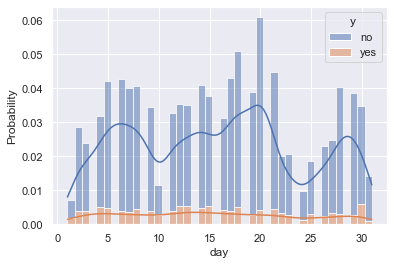

In [11]:
sns.histplot(data=bank, x="day", hue="y", stat='probability', multiple="stack", kde=True)

*Según este gráfico parece que la variable "day" tiene una distribución casi uniforme, pues la probabilidad en los días parece tener valores similares a excepción de los días 24 y 31 donde la probabiliad parece ser menor*

<AxesSubplot:xlabel='duration', ylabel='Probability'>

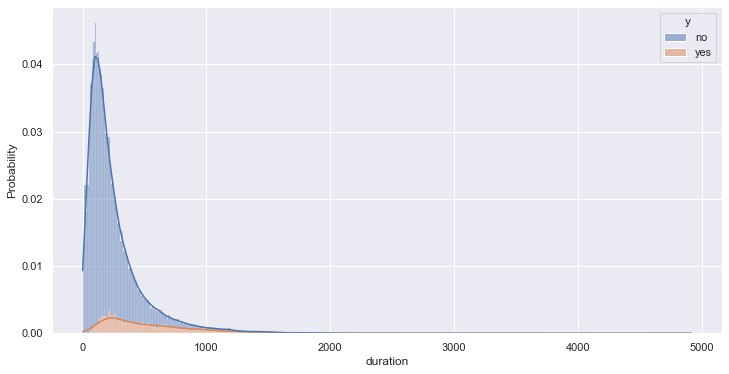

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(data=bank, x="duration", hue="y", stat='probability',  multiple="stack", kde=True)

*Podemos notar que la mayor probabilidad de que el cliente acepte el depósito a plazo se acumula en el intervalo de 0 a 1000 segundos de duración de contacto.*

<AxesSubplot:xlabel='duration', ylabel='Count'>

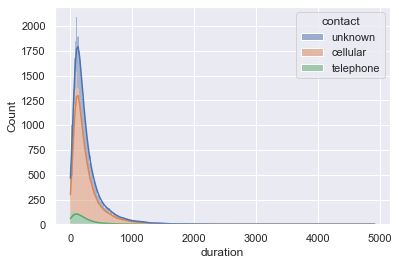

In [70]:
sns.histplot(data=bank, x="duration", hue="contact", multiple="stack", kde=True)

*La mayor cantidad de contactos es de tipo desconocida, en segundo lugar tenemos al contacto mediante llamada por celular y en el último lugar al contacto por teléfono.*

<AxesSubplot:xlabel='pdays', ylabel='Count'>

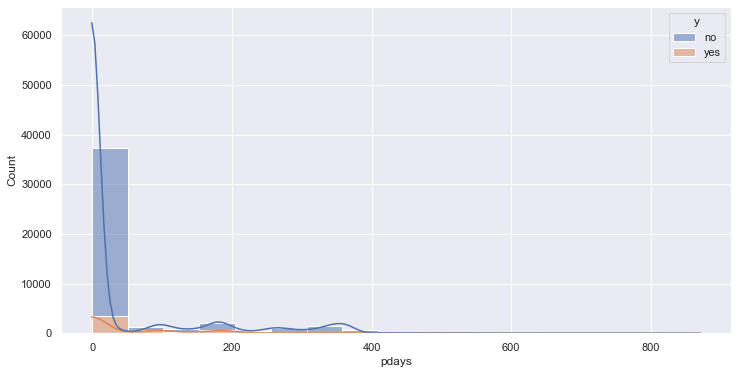

In [15]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(data=bank, x="pdays", hue="y", multiple="stack", kde=True)

*Podemos observar que la mayor probabilidad de que el cliente acepte el depósito a plazo se acumula en el intervalo de 0 a 500 días para la variable "pdays: días que pasaron después de que se contactó al cliente por última vez desde una campaña anterior"*

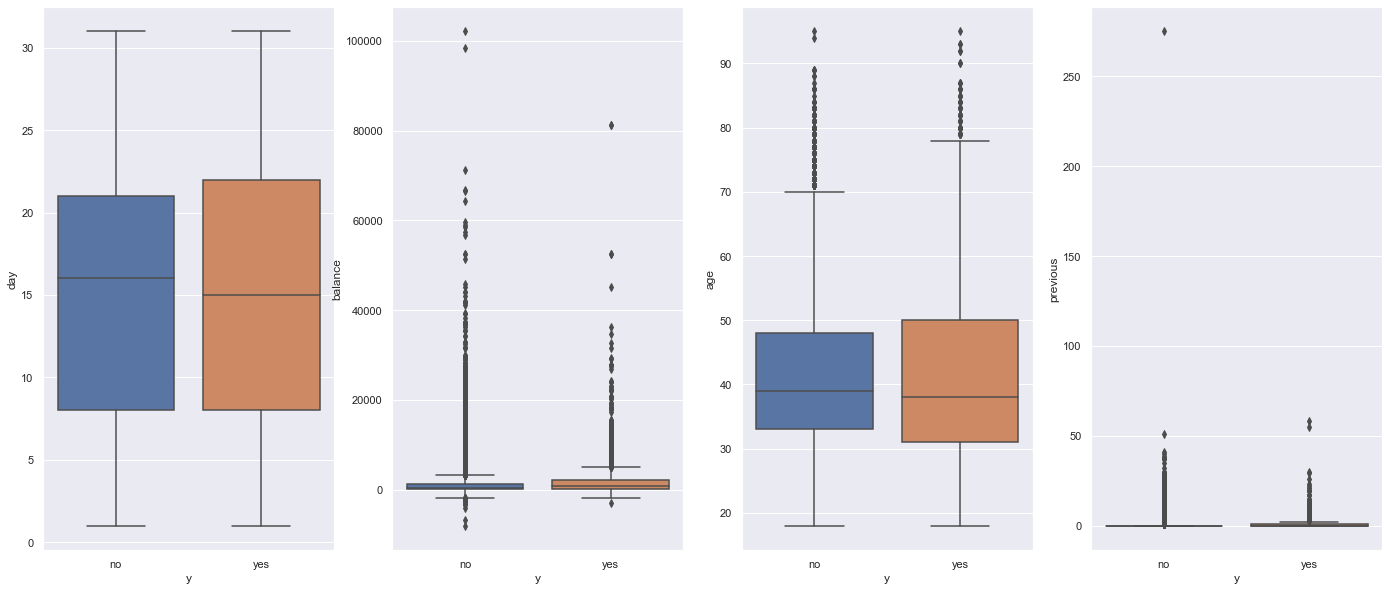

In [52]:
#Diagrama de Cajas
fig,axes = plt.subplots(1,4,figsize=(24,10))
for idx,num_col in enumerate({'day', 'age', 'previous', 'balance'}):
    sns.boxplot(y=num_col,data=bank,x='y',ax=axes[idx])

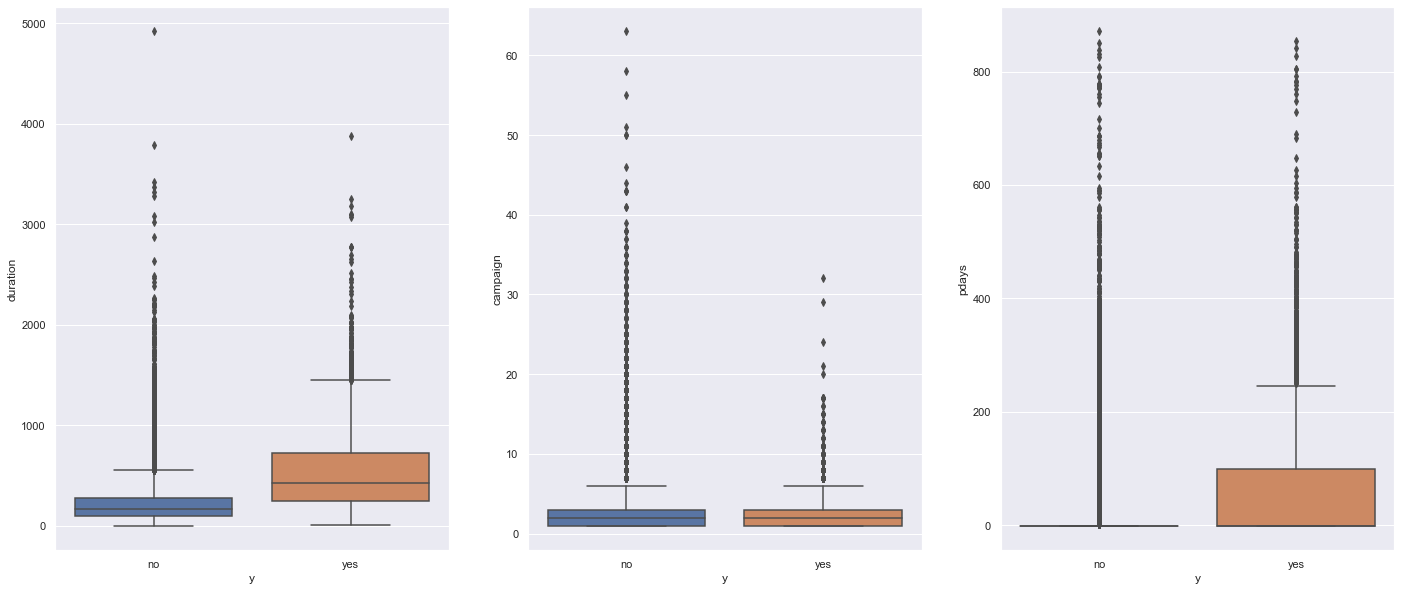

In [54]:
fig,axes = plt.subplots(1,3,figsize=(24,10))
for idx,num_col in enumerate({'campaign', 'duration', 'pdays'}):
    sns.boxplot(y=num_col,data=bank,x='y',ax=axes[idx])

*Podemos notar la presencia de Outliers en la data numérica , por ejemplo en las variables "duration", "balance", "previous", "campaign".*

**Visualizaciones para variables no numéricas**

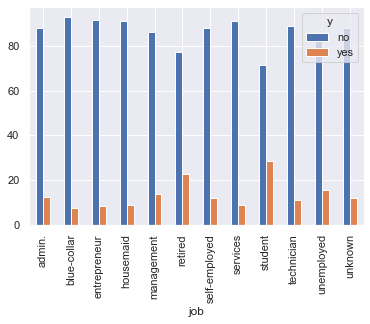

In [24]:
plot = pd.crosstab(index=bank['job'],
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

*Los estudiantes son quienes en mayor cantidad aceptan el depósito a plazo y los "blue-collar" (obreros, agricultores, etc) quienes más rechazan este depósito.*

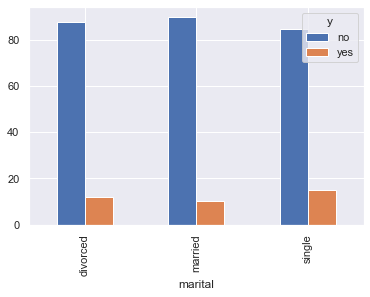

In [25]:
plot = pd.crosstab(index=bank['marital'],
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

*Parece no haber mucha diferencia entre la cantidad de casados , divorciados o solteros que rechazan o aceptan el depósito a plazo.*

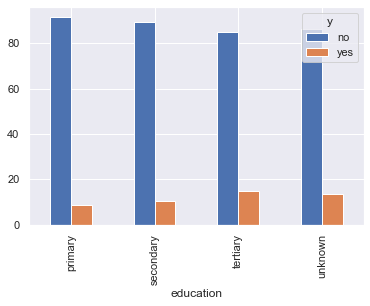

In [26]:
plot = pd.crosstab(index=bank['education'],
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

*Lo mismo ocurre con la variable "education"*

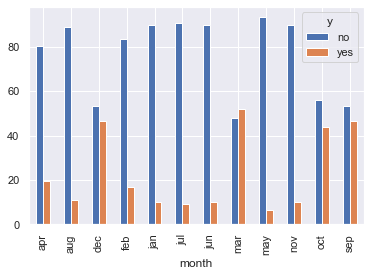

In [27]:
plot = pd.crosstab(index=bank['month'],
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

*Podemos ver que el mes con mayor probabilidad de aceptación es marzo, seguido por septiembre, octubre y diciembre.*

*Asimismo, el mes con mayor probabilidad de rechazo es mayo, seguido de noviembre, julio y junio.*

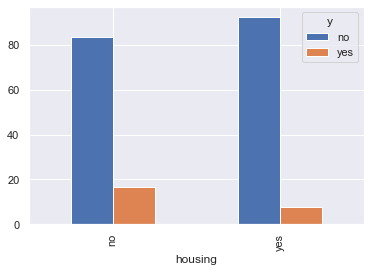

In [23]:
plot = pd.crosstab(index=bank['housing'], # prestamo de vivienda (si/no)
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')


*Las personas que no tienen un préstamo de vivienda tienen más posibilidad de aceptar el depósito a plazo.*

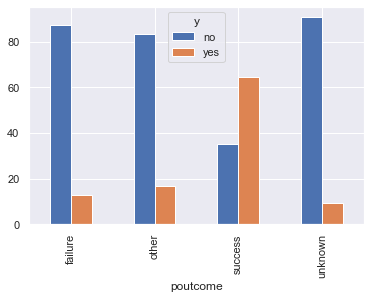

In [71]:
plot = pd.crosstab(index=bank['poutcome'], 
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

*Si el resultado de la campaña de marketing anterior fue "éxito" lo más probable es que en la actual la persona también acepte.*

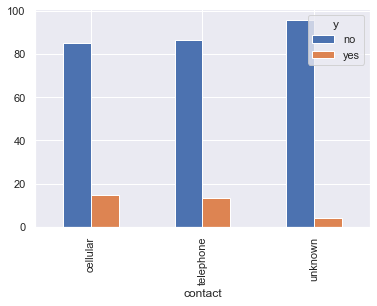

In [74]:
plot = pd.crosstab(index=bank['contact'], 
            columns=bank['y']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

*Se observa que en mayor proporción los contactos mediante celular y teléfono son más probables a tener éxito con la aceptación del depósito a plazo.*

## FEATURE SELECTION: Mutual Information

¿Por qué usar "Mutual Information" para encontrar alguna relacion entre la característica y la variable target?
Rpta: Mutual Information puede predecir cualquier tipo de relación mientras que la correlación solo predice la relación linear entre la característica y la variable target

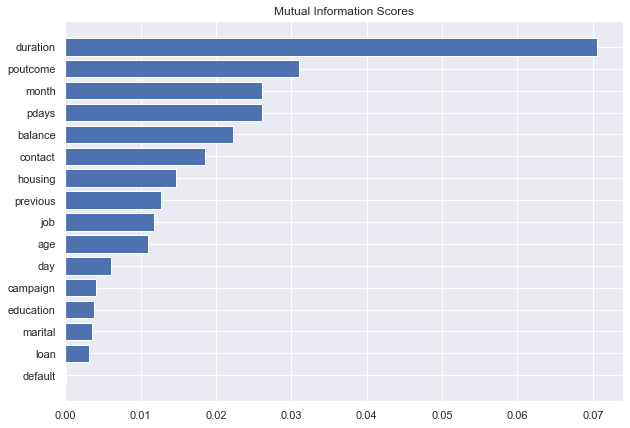

In [4]:
def cal_mi_score(df,y):
    for col in df.select_dtypes(['object']):
        df[col],unique = df[col].factorize()
    mi_scores = mutual_info_classif(df,y,discrete_features='auto', random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(10,7))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
df_eda = bank.copy()
target = df_eda.pop('y')
scores = cal_mi_score(df_eda,target)
plot_mi_scores(scores)

**Eligiré mantener las 10 primeras variables más significativas**

In [34]:
to_drop = ['default','loan','marital','education','campaign','day']
bank.drop(columns=to_drop, axis=1, inplace = True)
bank.head()

,age,job,balance,housing,contact,month,duration,pdays,previous,poutcome,y
0,58,management,2143,yes,unknown,may,261,-1,0,unknown,no
1,44,technician,29,yes,unknown,may,151,-1,0,unknown,no
2,33,entrepreneur,2,yes,unknown,may,76,-1,0,unknown,no
3,47,blue-collar,1506,yes,unknown,may,92,-1,0,unknown,no
4,33,unknown,1,no,unknown,may,198,-1,0,unknown,no


## PRE-PROCESAMIENTO DE DATA:

In [5]:
numeric_columns = set(bank.select_dtypes(include=['number']).columns)
non_numeric_columns = set(bank.columns) - numeric_columns
print(numeric_columns)
print(non_numeric_columns)

{'age', 'duration', 'balance', 'pdays', 'previous'}
{'housing', 'contact', 'job', 'y', 'poutcome', 'month'}


**Codificando columnas de tipo Object:**

In [35]:
for col in bank.select_dtypes(['object']):
    bank[col],unique = bank[col].factorize(sort= True)

In [36]:
bank.head()

,age,job,balance,housing,contact,month,duration,pdays,previous,poutcome,y
0,58,4,2143,1,2,8,261,-1,0,3,0
1,44,9,29,1,2,8,151,-1,0,3,0
2,33,2,2,1,2,8,76,-1,0,3,0
3,47,1,1506,1,2,8,92,-1,0,3,0
4,33,11,1,0,2,8,198,-1,0,3,0


**Tratamiento de Outliers:**

*Realizré un recorte de los datos basandome en los límites superior e inferior de cada variable utilizando los cuartiles 1 , 3 y el rango intercuartílico.*

In [37]:
# funcion para calcular el limite superior e inferior de las variables 
def limites(columna):
    c = [.25,.75]
    q1,q3=columna.quantile(c)
    ## calculamos
    lim_inf = q3 - 1.5* (q3-q1)
    lim_sup = q3 + 1.5* (q3-q1)
    return(lim_inf ,lim_sup)

In [38]:
# Analizamos las variables numericas
a,b = limites(bank["age"])
print (' el limite inferior es:', a)
print (' el limite superior es:', b)

#recorte
bank.loc[bank["age"]<a,"age"] = a 
bank.loc[bank["age"]>b,"age"] = b 

 el limite inferior es: 25.5
 el limite superior es: 70.5


In [42]:
a,b = limites(bank["balance"])
print (' el limite inferior es:', a) # el balance anual en euros en negativo, significa que la persona presenta mas pasivos que activos
print (' el limite superior es:', b)

#recorte
bank.loc[bank["balance"]<a,"balance"] = a 
bank.loc[bank["balance"]>b,"balance"] = b 

 el limite inferior es: -606.0
 el limite superior es: 3462.0


In [43]:
a,b = limites(bank["previous"])
print (' el limite inferior es:', a)
print (' el limite superior es:', b)

#recorte
bank.loc[bank["previous"]<a,"previous"] = a 
bank.loc[bank["previous"]>b,"previous"] = b 

 el limite inferior es: 0.0
 el limite superior es: 0.0


In [44]:
a,b = limites(bank["duration"])
print (' el limite inferior es:', 0) # sabemos que no podemos tener duraciones negativas, ya que no existen, el limite en este caso es 0 
print (' el limite superior es:', b)

#recorte
bank.loc[bank["duration"]<0,"duration"] = 0
bank.loc[bank["duration"]>b,"duration"] = b 

 el limite inferior es: 0
 el limite superior es: 643.0


In [45]:
# bank["pdays"]
#cambio , cuando el valor sea -1 , se le asignara un valor de 0 , lo cual significa que no fue contactado. Con la finalidad de no tener numeros negativos en la variable.
bank["pdays"]= bank["pdays"].replace([-1],0) 

In [46]:
bank.head()

,age,job,balance,housing,contact,month,duration,pdays,previous,poutcome,y
0,58.0,4,2143,1,2,8,261,0,0,3,0
1,44.0,9,29,1,2,8,151,0,0,3,0
2,33.0,2,2,1,2,8,76,0,0,3,0
3,47.0,1,1506,1,2,8,92,0,0,3,0
4,33.0,11,1,0,2,8,198,0,0,3,0


**revisión**

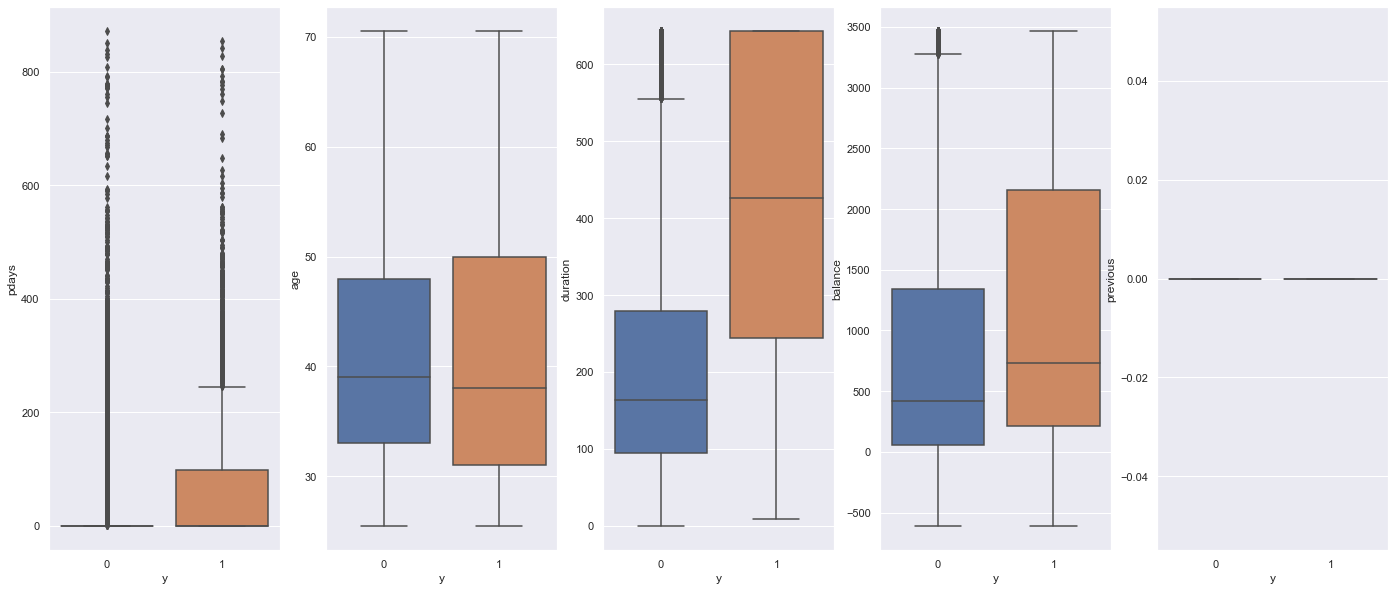

In [47]:
fig,axes = plt.subplots(1,5,figsize=(24,10))
for idx,num_col in enumerate({'age', 'balance', 'previous', 'duration','pdays'}):
    sns.boxplot(y=num_col,data=bank,x='y',ax=axes[idx])

*Podemos ver que usando la técnica de recorte la variable "previous" solo tiene un único valor, por lo que no será de aporte para el buen desempeño del modelo. Esto podremos verlo más adelante.* **(dejaré dicha variable con únicos valores a propósito, pero es algo que no se debería hacer).**

**Normalizando campos numéricos**: con la finalidad de tener los valores de las variables en una misma escala.

In [62]:
prueba=bank.copy()
prueba = prueba[['age','balance','duration','pdays','previous']]

In [56]:
prueba.head()

,age,balance,duration,pdays,previous
0,58.0,2143,261,0,0
1,44.0,29,151,0,0
2,33.0,2,76,0,0
3,47.0,1506,92,0,0
4,33.0,1,198,0,0


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prueba = scaler.fit_transform(prueba)

In [64]:
prueba

array([[0.72222222, 0.67576205, 0.4059098 , 0.        , 0.        ],
       [0.41111111, 0.15609636, 0.2348367 , 0.        , 0.        ],
       [0.16666667, 0.14945919, 0.11819596, 0.        , 0.        ],
       ...,
       [1.        , 1.        , 1.        , 0.21125144, 0.        ],
       [0.7       , 0.31317601, 0.79004666, 0.        , 0.        ],
       [0.25555556, 0.87930187, 0.56143079, 0.21584386, 0.        ]])

In [65]:
prueba=pd.DataFrame(prueba, columns = ['age','balance','duration','pdays','previous'])
prueba.head()

,age,balance,duration,pdays,previous
0,0.722222,0.675762,0.405910,0.0,0.0
1,0.411111,0.156096,0.234837,0.0,0.0
2,0.166667,0.149459,0.118196,0.0,0.0
3,0.477778,0.519174,0.143079,0.0,0.0
4,0.166667,0.149213,0.307932,0.0,0.0


In [66]:
to_drop2 = ['age','balance','duration','pdays','previous']
bank.drop(columns=to_drop2, axis=1, inplace = True)

In [67]:
bank.head()

,job,housing,contact,month,poutcome,y
0,4,1,2,8,3,0
1,9,1,2,8,3,0
2,2,1,2,8,3,0
3,1,1,2,8,3,0
4,11,0,2,8,3,0


**Concatenando dataframes**

In [68]:
df_bank = pd.concat([prueba, bank],axis=1)
df_bank.head()

,age,balance,duration,pdays,previous,job,housing,contact,month,poutcome,y
0,0.722222,0.675762,0.405910,0.0,0.0,4,1,2,8,3,0
1,0.411111,0.156096,0.234837,0.0,0.0,9,1,2,8,3,0
2,0.166667,0.149459,0.118196,0.0,0.0,2,1,2,8,3,0
3,0.477778,0.519174,0.143079,0.0,0.0,1,1,2,8,3,0
4,0.166667,0.149213,0.307932,0.0,0.0,11,0,2,8,3,0


In [69]:
df_bank.to_csv('df_bank_clean2.csv',index = False)

In [70]:
df_bank=pd.read_csv("df_bank_clean2.csv")
df_bank.head()

,age,balance,duration,pdays,previous,job,housing,contact,month,poutcome,y
0,0.722222,0.675762,0.405910,0.0,0.0,4,1,2,8,3,0
1,0.411111,0.156096,0.234837,0.0,0.0,9,1,2,8,3,0
2,0.166667,0.149459,0.118196,0.0,0.0,2,1,2,8,3,0
3,0.477778,0.519174,0.143079,0.0,0.0,1,1,2,8,3,0
4,0.166667,0.149213,0.307932,0.0,0.0,11,0,2,8,3,0


## Evaluación de Modelos Parte 1:

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [73]:
X = df_bank.drop('y',axis=1)
y = df_bank['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, stratify=y,random_state = 0) 

In [74]:
def evaluar_modelo(model,xtrain,xtest,ytrain,ytest):
  
  print("En train")
  model.fit(xtrain, ytrain)
  predicted_train=model.predict(xtrain)
  print(confusion_matrix(ytrain, predicted_train))
  print(classification_report(ytrain,predicted_train))
  print("Ahora en test")
  predicted_test=model.predict(xtest)
  print(confusion_matrix(ytest, predicted_test))
  print(classification_report(ytest,predicted_test))

In [75]:
rf = RandomForestClassifier()
evaluar_modelo(rf,X_train,X_test,y_train,y_test)

En train
[[23953     0]
 [    0  3173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23953
           1       1.00      1.00      1.00      3173

    accuracy                           1.00     27126
   macro avg       1.00      1.00      1.00     27126
weighted avg       1.00      1.00      1.00     27126

Ahora en test
[[15403   566]
 [ 1226   890]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     15969
           1       0.61      0.42      0.50      2116

    accuracy                           0.90     18085
   macro avg       0.77      0.69      0.72     18085
weighted avg       0.89      0.90      0.89     18085



In [76]:
xgbcla = XGBClassifier(objective='binary:logistic', use_label_encoder=False)
evaluar_modelo(xgbcla,X_train,X_test,y_train,y_test)

En train
[23:01:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\51922\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[[23651   302]
 [  974  2199]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23953
           1       0.88      0.69      0.78      3173

    accuracy                           0.95     27126
   macro avg       0.92      0.84      0.87     27126
weighted avg       0.95      0.95      0.95     27126

Ahora en test
[[15335   634]
 [ 1176   940]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     15969
           1       0.60      0.44      0.51      2116

    accuracy                           0.90     18085
   macro avg       0.76      0.70      0.73     18085
weighted avg       0.89      0.90      0.89     18085



C:\Users\51922\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [80]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=20)
evaluar_modelo(KNC,X_train,X_test,y_train,y_test)

En train
[[23717   236]
 [ 2531   642]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     23953
           1       0.73      0.20      0.32      3173

    accuracy                           0.90     27126
   macro avg       0.82      0.60      0.63     27126
weighted avg       0.88      0.90      0.87     27126

Ahora en test
[[15756   213]
 [ 1723   393]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     15969
           1       0.65      0.19      0.29      2116

    accuracy                           0.89     18085
   macro avg       0.77      0.59      0.62     18085
weighted avg       0.87      0.89      0.87     18085



In [81]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
evaluar_modelo(DTC,X_train,X_test,y_train,y_test)

En train
[[23953     0]
 [    0  3173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23953
           1       1.00      1.00      1.00      3173

    accuracy                           1.00     27126
   macro avg       1.00      1.00      1.00     27126
weighted avg       1.00      1.00      1.00     27126

Ahora en test
[[14742  1227]
 [ 1107  1009]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     15969
           1       0.45      0.48      0.46      2116

    accuracy                           0.87     18085
   macro avg       0.69      0.70      0.70     18085
weighted avg       0.87      0.87      0.87     18085



## Balance de clases

In [82]:
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [83]:
SMT=SMOTEENN() 
x_bal, y_bal= SMT.fit_resample(X_train,y_train) 
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_bal))

Resampled dataset shape Counter({1: 20870, 0: 19286})


**SMOTEEN: este método combina la capacidad de SMOTE para generar ejemplos sintéticos para la clase minoritaria y la capacidad de ENN para eliminar algunas observaciones de ambas clases que se identifican como de clase diferente entre la clase de la observación y su clase mayoritaria vecina más cercana.**

In [84]:
x_bal.head()

,age,balance,duration,pdays,previous,job,housing,contact,month,poutcome
0,0.255556,0.390855,0.279938,0.000000,0.0,4,1,0,1,3
1,0.566667,0.482547,0.362364,0.000000,0.0,6,1,0,9,3
2,0.233333,0.251721,0.242613,0.000000,0.0,7,1,0,8,3
3,0.188889,0.249508,0.161742,0.000000,0.0,7,1,0,0,3
4,0.100000,0.244838,0.272162,0.398393,0.0,0,1,0,0,0


In [85]:
y_bal.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

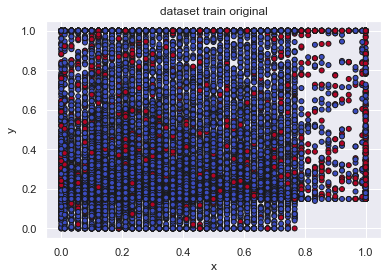

In [147]:
plt.title('dataset train original')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], marker='o', c=y_train,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

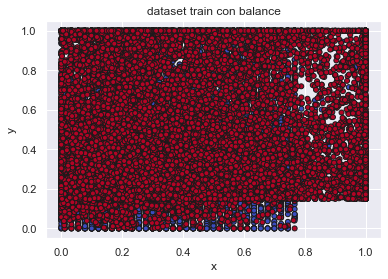

In [148]:
plt.title('dataset train con balance')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_bal.iloc[:, 0], x_bal.iloc[:, 1], marker='o', c=y_bal,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

**Guardando el dataset balanceado para pruebas futuras**

In [86]:
bank_bal=pd.concat([x_bal, y_bal], axis=1) 
bank_bal.head()

,age,balance,duration,pdays,previous,job,housing,contact,month,poutcome,y
0,0.255556,0.390855,0.279938,0.000000,0.0,4,1,0,1,3,0
1,0.566667,0.482547,0.362364,0.000000,0.0,6,1,0,9,3,0
2,0.233333,0.251721,0.242613,0.000000,0.0,7,1,0,8,3,0
3,0.188889,0.249508,0.161742,0.000000,0.0,7,1,0,0,3,0
4,0.100000,0.244838,0.272162,0.398393,0.0,0,1,0,0,0,0


In [87]:
bank_bal.to_csv('df_bank_bal2.csv',index = False)

In [88]:
bank_bal=pd.read_csv("df_bank_bal2.csv")
bank_bal.head()

,age,balance,duration,pdays,previous,job,housing,contact,month,poutcome,y
0,0.255556,0.390855,0.279938,0.000000,0.0,4,1,0,1,3,0
1,0.566667,0.482547,0.362364,0.000000,0.0,6,1,0,9,3,0
2,0.233333,0.251721,0.242613,0.000000,0.0,7,1,0,8,3,0
3,0.188889,0.249508,0.161742,0.000000,0.0,7,1,0,0,3,0
4,0.100000,0.244838,0.272162,0.398393,0.0,0,1,0,0,0,0


## Evaluación de modelos parte 2:

In [89]:
rf = RandomForestClassifier()
evaluar_modelo(rf,x_bal,X_test,y_bal,y_test)

En train
[[19286     0]
 [    0 20870]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19286
           1       1.00      1.00      1.00     20870

    accuracy                           1.00     40156
   macro avg       1.00      1.00      1.00     40156
weighted avg       1.00      1.00      1.00     40156

Ahora en test
[[13486  2483]
 [  341  1775]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     15969
           1       0.42      0.84      0.56      2116

    accuracy                           0.84     18085
   macro avg       0.70      0.84      0.73     18085
weighted avg       0.91      0.84      0.86     18085



In [90]:
xgbcla = XGBClassifier(objective='binary:logistic',use_label_encoder=False) 
evaluar_modelo(xgbcla,x_bal,X_test,y_bal,y_test)

En train
[23:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[19079   207]
 [  199 20671]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19286
           1       0.99      0.99      0.99     20870

    accuracy                           0.99     40156
   macro avg       0.99      0.99      0.99     40156
weighted avg       0.99      0.99      0.99     40156

Ahora en test
[[13985  1984]
 [  434  1682]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     15969
           1       0.46      0.79      0.58      2116

    accuracy                           0.87     18085
   macro avg       0.71      0.84      0.75     18085
weight

In [91]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=5)
evaluar_modelo(KNC,x_bal,X_test,y_bal,y_test)

En train
[[19038   248]
 [  148 20722]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19286
           1       0.99      0.99      0.99     20870

    accuracy                           0.99     40156
   macro avg       0.99      0.99      0.99     40156
weighted avg       0.99      0.99      0.99     40156

Ahora en test
[[13055  2914]
 [  425  1691]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     15969
           1       0.37      0.80      0.50      2116

    accuracy                           0.82     18085
   macro avg       0.67      0.81      0.69     18085
weighted avg       0.90      0.82      0.84     18085



In [92]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
evaluar_modelo(DTC,x_bal,X_test,y_bal,y_test)

En train
[[19286     0]
 [    0 20870]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19286
           1       1.00      1.00      1.00     20870

    accuracy                           1.00     40156
   macro avg       1.00      1.00      1.00     40156
weighted avg       1.00      1.00      1.00     40156

Ahora en test
[[13408  2561]
 [  494  1622]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     15969
           1       0.39      0.77      0.52      2116

    accuracy                           0.83     18085
   macro avg       0.68      0.80      0.71     18085
weighted avg       0.90      0.83      0.85     18085



**Podemos notar que el desempeño de los modelos ha mejorado, el valor de f1-score: 2 * (precision * recall) / (precision + recall) de la clase 1, se ha incrementado  con el balanceo de clases a la hora de predecir con el dataset "test", sin embargo el Accuracy del modelo disminuye un poco. Entre estos modelos elegidos el que mejor desempeño tiene es XGBClassifier, por lo tanto realizaré una búsqueda de parámetros para intentar mejorar un poco más el modelo**

In [93]:
parameters = {
        'min_child_weight': [1,3,5],
        'gamma': [0 ,0.05, 0.1,0.5],
        'max_depth': [4,5,6,8],
        'subsample' : [0.8],
        'learning_rate': [0.01,0.05,0.1,0.5],
        'n_estimators':[150,200,250],
        }
      
model_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed=27)
xg_CV =GridSearchCV(model_xgb, parameters , n_jobs=4, cv=3,verbose=1) 
xg_CV.fit(x_bal,y_bal)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


C:\Users\51922\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=27, subsample=No

In [94]:
xg_CV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.05, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [95]:
xg_best=xg_CV.best_estimator_
evaluar_modelo(xg_best,x_bal,X_test,y_bal,y_test)

En train
[23:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[19173   113]
 [  107 20763]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19286
           1       0.99      0.99      0.99     20870

    accuracy                           0.99     40156
   macro avg       0.99      0.99      0.99     40156
weighted avg       0.99      0.99      0.99     40156

Ahora en test
[[13938  2031]
 [  407  1709]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     15969
           1       0.46      0.81      0.58      2116

    accuracy                           0.87     18085
   macro avg       0.71      0.84      0.75     18085
weight

*Podemos notar que el modelo predice un  poco mejor los True positive de la clase '1' y el recall aumentó*

## Explicabilidad del modelo

In [124]:
import shap
explainer = shap.Explainer(xg_best)
shap_values = explainer(X)

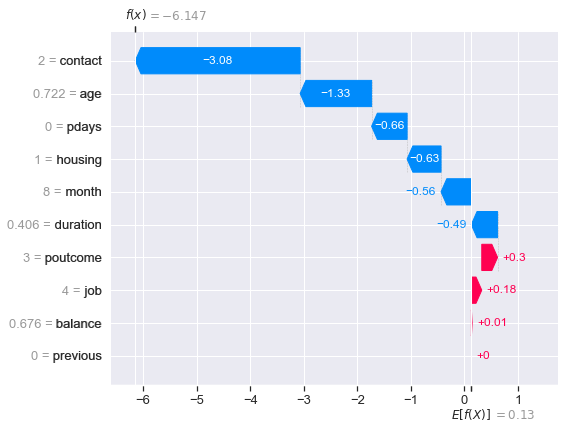

In [125]:
shap.plots.waterfall(shap_values[0])

* Este gráfico sirve para saber cuanto ha aportado cada feature a la predicción del modelo aumentando o reduciendo la probabilidad. Podemos ver que la variable contacto tiene el mayor  impacto en el modelo y la variable que tiene menos impacto es previous.

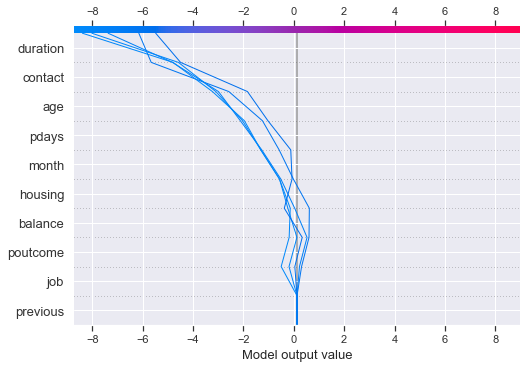

In [126]:
# DECISION PLOT
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot para 5 observaciones
shap.decision_plot(expected_value, shap_array[0:5],feature_names=list(X.columns))

* Podemos ver que variables como duracion, contacto, edad disminuyen el valor de la prediccion. Por otro lado, poutcome, job y balance aumentan el valor de la predicción.

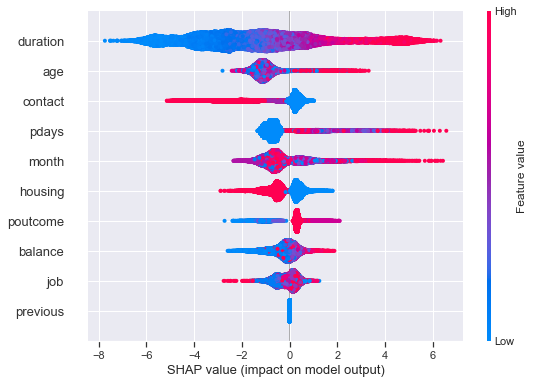

In [118]:
shap.summary_plot(shap_values, X) 

* Observamos que Los valores altos de contact hacen que el output del modelo tenga un valor mas bajo, a diferencia de la duración del contacto en donde al parecer el modelo asume que a valores mas altos hay más probabilidad de que la clase sea '1'. 

* Notamos que previous no aporta nada significativo al modelo, ya que esta variable tiene un único valor.

* A menor valor de duración será menor el valor del output del modelo.

* El impacto de la edad generalmente es para reducir el valor output, puesto que se observa un gran cúmulo a la derecha del eje central.

* También se observa que para el modelo los valores de balance no aportan mucho a la salida del modelo, ya que sus valores se acumulan en el eje central en mayor proporción.

## Conclusiones

* El modelo con mejor desempeño fue XGBCLASSIFIER. Se pudo conseguir un accuracy de 87% en test, reconociendo mejor a la clase '1' y valores F1-score de 0.92 y 0.58 para las clases 0 y 1 respectivamente.

* El recorte de datos atípicos en las columnas numéricas utilizando los cuartiles 1 y 3 para hallar el límite superior e inferior fue de bastante ayuda para el modelo.

* La normalización Min-Max Scaler fue punto clave en el pre-procesamiento, pues ayudó a mejorar el rendimiento en comparación con la utilización de la data sin escalar.

* Balancear la data ayudó a mejorar un poco el desempeño de los modelos. Especificamente la utilización de SMOTEENN me resultó mejor que SMOTE; sin embargo, la mejora es bastante baja comparándola con el resultado que se obtiene al no balancear, por lo que se recomienda no balancear la data y de ese modo no afectar al recurso computacional.

* Se deben realizar pruebas nuevas quitando aquellas variables que  no tuvieron un aporte grande en la decisión del modelo como: 'previous' (variable con valor único de cero) y 'balance' 

## Referencias:

* Wai On.(2020).*Visualizing AI: Deconstructing and Optimizing the SHAP Summary Plot*. Recuperado de: https://towardsdatascience.com/visualizing-ai-8fad4ea70b87

* Jain,A.(2016).*Complete Guide to Parameter Tuning in XGBoost*. Recuperado de: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

* Acevedo,N.(2020).*Matriz de confusión en Machine Learning.* Recuperado de: https://nataliaacevedo.com/matriz-de-confusion-en-machine-learning-explicado-paso-a-paso/

* Andhika, R (2021).*Imbalanced Classification in Python: SMOTE-ENN Method*. Recuperado de: https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50


**Gracias**